In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math as mt
import random
import pandas as pd
%matplotlib inline

In [397]:
# Непрерывное распределение Фиск c = 4
c = 4.
brad_rv = sts.fisk(c)
sample = brad_rv.rvs(1000)

# Получаем мат. ожидание и дисперсию
MU, SIGMA, skew, kurt = sts.fisk.stats(c, moments='mvsk')
print MU
print SIGMA

1.11072073454
0.337095776659


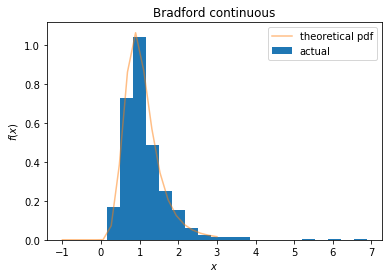

In [381]:
# Гистограмма выборки
plt.hist(sample, bins=20,normed=True, label='actual')

# Теоретическая плотность распределения
x = np.linspace(-1,3,20)
pdf = brad_rv.pdf(x) # функция плотности вероятности
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)

plt.legend()
plt.title('Bradford continuous')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [390]:
# создадим функцию для рассчетов параметров случайной выборки
# sample исходная выборка
# size размер случайно выборки
# counts количество выборок из исходной выборки
def analize(sample, size, counts = 1000):
    means = []
    
    # Считаем counts мат. ожиданий от случайных выборок распределения
    means.append([np.mean(random.sample(sample, size)) for i in range(counts)])
        
    # Среднее мат. ожидание
    m_mu = np.mean(means)
    
    # Стандартное отклонение
    m_sigma = np.std(means)
    
    # Плотность нормального распределения базовых значений
    SE = mt.sqrt(SIGMA/size)
    norm_rv = sts.norm(MU,SE)
    
    # Выводим все на график
    plt.hist(means,normed=True,bins=20,label='actual')
    plt.plot(x,norm_rv.pdf(x),label='theoretical pdf')
    plt.legend()
    plt.title("Size: %d" % size)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    # Выводим таблицу сравнения
    print pd.DataFrame({'Teoretical':[MU, SE], 'Calculate': [m_mu, m_sigma], 'Diff': [mt.fabs(MU - m_mu), mt.fabs(SE - m_sigma)]},index=['μ', 'σ'], columns=['Teoretical','Calculate', 'Diff'])
    print 'Confidence interval {:.2f} +/- {:.2f}'.format(m_mu,2*SE)

      Teoretical  Calculate      Diff
μ  1.11072073454   1.152888  0.042167
σ       0.259652   0.288712  0.029060
Confidence interval 1.15 +/- 0.52


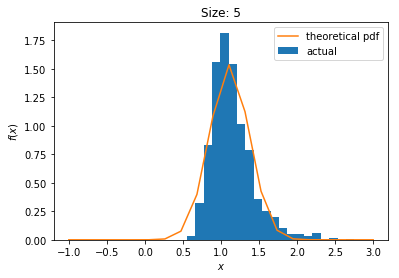

In [387]:
# Проводим эксперимент по выборке и наблюдаем за результатами
analize(sample,5)

      Teoretical  Calculate      Diff
μ  1.11072073454   1.148193  0.037473
σ       0.183602   0.195599  0.011997
Confidence interval 1.15 +/- 0.37


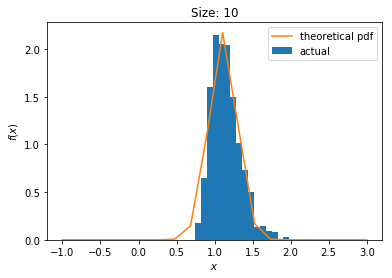

In [388]:
analize(sample,10)

      Teoretical  Calculate      Diff
μ  1.11072073454   1.092169  0.018552
σ      0.0821092   0.073706  0.008403
Confidence interval 1.09 +/- 0.16


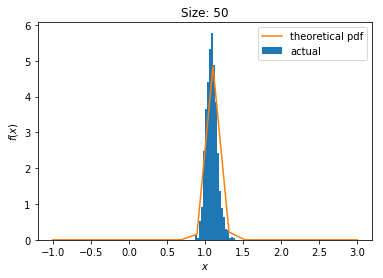

In [400]:
analize(sample,50)

По результатам выполнения экспериментов с различным объемом выборки n, можно сделать вывод, чем больше объем выборки тем математическое ожидение становится ближе к ожиданию исходного распределения. Также уменьшается среднеквадратичное отклонение и доверительный интервал становится уже. 

Исходя из вышесказанного, можно утверждать, что центральная предельная теорема проверена на практике и ее выводы совпадают с проведенными расчетами.